# Exercises week 38

## September 15-19

## Resampling and the Bias-Variance Trade-off


### Learning goals

After completing these exercises, you will know how to

- Derive expectation and variances values related to linear regression
- Compute expectation and variances values related to linear regression
- Compute and evaluate the trade-off between bias and variance of a model

### Deliverables

Complete the following exercises while working in a jupyter notebook. Then, in canvas, include

- The jupyter notebook with the exercises completed
- An exported PDF of the notebook (https://code.visualstudio.com/docs/datascience/jupyter-notebooks#_export-your-jupyter-notebook)


## Use the books!

This week deals with various mean values and variances in linear regression methods (here it may be useful to look up chapter 3, equation (3.8) of [Trevor Hastie, Robert Tibshirani, Jerome H. Friedman, The Elements of Statistical Learning, Springer](https://www.springer.com/gp/book/9780387848570)).

For more discussions on Ridge regression and calculation of expectation values, [Wessel van Wieringen's](https://arxiv.org/abs/1509.09169) article is highly recommended.

The exercises this week are also a part of project 1 and can be reused in the theory part of the project.

### Definitions

We assume that there exists a continuous function $f(\boldsymbol{x})$ and a normal distributed error $\boldsymbol{\varepsilon}\sim N(0, \sigma^2)$ which describes our data


$$
\boldsymbol{y} = f(\boldsymbol{x})+\boldsymbol{\varepsilon}
$$


We further assume that this continous function can be modeled with a linear model $\mathbf{\tilde{y}}$ of some features $\mathbf{X}$.


$$
\boldsymbol{y} = \boldsymbol{\tilde{y}} + \boldsymbol{\varepsilon} = \boldsymbol{X}\boldsymbol{\beta} +\boldsymbol{\varepsilon}
$$


We therefore get that our data $\boldsymbol{y}$ has an expectation value $\boldsymbol{X}\boldsymbol{\beta}$ and variance $\sigma^2$, that is $\boldsymbol{y}$ follows a normal distribution with mean value $\boldsymbol{X}\boldsymbol{\beta}$ and variance $\sigma^2$.


## Exercise 1: Expectation values for ordinary least squares expressions


**a)** With the expressions for the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ show that


$$
\mathbb{E}(\boldsymbol{\hat{\beta}_{OLS}}) = \boldsymbol{\beta}.
$$


$$
\boldsymbol{\hat{\beta}_{OLS}} = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}\boldsymbol{y},\, \boldsymbol{y}=\boldsymbol{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}
$$
If we regard the design matrix $\boldsymbol{X}$ as non-stochastic and $\boldsymbol{\epsilon}\sim N(0,\sigma^2)$, then
$$
\Rightarrow \mathbb{E}(\boldsymbol{\hat{\beta}_{OLS}}) = \mathbb{E}[(\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T(\boldsymbol{X}\boldsymbol{\beta}+\boldsymbol{\epsilon})]
$$
$$
= (\boldsymbol{X}^T\boldsymbol{X})^{-1}(\boldsymbol{X}^T\boldsymbol{X})(\mathbb{E}[\boldsymbol{\beta}]+\boldsymbol{X}^{-1}\mathbb{E}[\boldsymbol{\epsilon}])=I\mathbb{E}[\boldsymbol{\beta}]=\boldsymbol{\beta}
$$

**b)** Show that the variance of $\boldsymbol{\hat{\beta}_{OLS}}$ is


$$
\mathbf{Var}(\boldsymbol{\hat{\beta}_{OLS}}) = \sigma^2 \, (\mathbf{X}^{T} \mathbf{X})^{-1}.
$$


$$
\mathbf{Var}(\boldsymbol{\hat{\beta}_{OLS}}) = \mathbb{E}[(\boldsymbol{\beta}_{OLS}-\mathbb{E}[\boldsymbol{\beta}_{OLS}])^2]
$$
$$
=\mathbb{E}[((\boldsymbol{X}^T\boldsymbol{X})^{-1}(\boldsymbol{X}^T\boldsymbol{X})(\boldsymbol{\beta}-\boldsymbol{\beta}+\boldsymbol{X}^{-1}\boldsymbol{\epsilon}))^2]
$$
Using that $\mathbb{E}[\boldsymbol{\epsilon}]=0$, we can write $\boldsymbol{\epsilon}=\boldsymbol{\epsilon}-\mathbb{E}[\boldsymbol{\epsilon}]$
$$
= \mathbb{E}[\boldsymbol{X}^{-1}(\boldsymbol{\epsilon}-\mathbb{E}[\boldsymbol{\epsilon}])^2]=\mathbf{Var}[\boldsymbol{X}^{-1}\boldsymbol{\epsilon}]
$$
$$
=\boldsymbol{X}^{-1}\mathbf{Var}[\boldsymbol{\epsilon}](\boldsymbol{X}^T)^{-1} = \sigma^2(\boldsymbol{X}^T\boldsymbol{X})^{-1}
$$

We can use the last expression when we define a [confidence interval](https://en.wikipedia.org/wiki/Confidence_interval) for the parameters $\boldsymbol{\hat{\beta}_{OLS}}$.
A given parameter ${\boldsymbol{\hat{\beta}_{OLS}}}_j$ is given by the diagonal matrix element of the above matrix.


## Exercise 2: Expectation values for Ridge regression


**a)** With the expressions for the optimal parameters $\boldsymbol{\hat{\beta}_{Ridge}}$ show that


$$
\mathbb{E} \big[ \hat{\boldsymbol{\beta}}^{\mathrm{Ridge}} \big]=(\mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I}_{pp})^{-1} (\mathbf{X}^{\top} \mathbf{X})\boldsymbol{\beta}
$$


We see that $\mathbb{E} \big[ \hat{\boldsymbol{\beta}}^{\mathrm{Ridge}} \big] \not= \mathbb{E} \big[\hat{\boldsymbol{\beta}}^{\mathrm{OLS}}\big ]$ for any $\lambda > 0$.


$$
\mathbb{E}[\boldsymbol{\beta}_{\text{Ridge}}] = \mathbb{E}[(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I})^{-1}\boldsymbol{X}^T\boldsymbol{X}(\boldsymbol{\beta}+\boldsymbol{X}^{-1}\boldsymbol{\epsilon})]
$$


**b)** Why do we say that Ridge regression gives a biased estimate? Is this a problem?


By introducing the hyperparameter $\lambda$, the model predictions will deviate from the target training data by penalizing large coefficients in $\beta$. This bias can lead to underfitting, so that the model fails to capture some complex relations in the training data. But on the other hand, Ridge regression reduces overfitting (complex model fit well to training data but with limited ability to make accurate predictions).

**c)** Show that the variance is


$$
\mathbf{Var}[\hat{\boldsymbol{\beta}}^{\mathrm{Ridge}}]=\sigma^2[  \mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I} ]^{-1}  \mathbf{X}^{T}\mathbf{X} \{ [  \mathbf{X}^{\top} \mathbf{X} + \lambda \mathbf{I} ]^{-1}\}^{T}
$$


$$
\mathbf{Var}[\boldsymbol{\beta}_{\text{Ridge}}] = \mathbf{Var}[(\boldsymbol{X}^T\boldsymbol{X}+\lambda \boldsymbol{I})^{-1}\boldsymbol{X}^T(\boldsymbol{X}\boldsymbol{\beta}+\boldsymbol{\epsilon})]
$$

Define $W_{\lambda}=(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I})^{-1}\boldsymbol{X}^T$
$$
\Rightarrow \mathbf{Var}[\boldsymbol{\beta}_{\text{Ridge}}] = W_{\lambda} \mathbf{Var}[\boldsymbol{X}\boldsymbol{\beta}+\boldsymbol{\epsilon}]W_{\lambda}^T
$$
$$
\mathbf{Var}[\boldsymbol{X}\boldsymbol{\beta}+\boldsymbol{\epsilon}] = \mathbb{E}[(\boldsymbol{X}\boldsymbol{\beta}-\boldsymbol{X}\mathbb{E}[\boldsymbol{\beta}]+\boldsymbol{\epsilon}-\mathbb{E}[\epsilon])^2]=\mathbf{Var}[\boldsymbol{\epsilon}]=\sigma^2
$$
Inserting this into the equation above yields
$$
\mathbf{Var}[\boldsymbol{\beta}_{\text{Ridge}}] = \sigma^2(\boldsymbol{X}^T\boldsymbol{X}+\lambda \boldsymbol{I})^{-1}\boldsymbol{X}^T\boldsymbol{X}\{(\boldsymbol{X}^T\boldsymbol{X}+\lambda \boldsymbol{I})^{-1}\}^T
$$

We see that if the parameter $\lambda$ goes to infinity then the variance of the Ridge parameters $\boldsymbol{\beta}$ goes to zero.


## Exercise 3: Deriving the expression for the Bias-Variance Trade-off


The aim of this exercise is to derive the equations for the bias-variance tradeoff to be used in project 1.

The parameters $\boldsymbol{\hat{\beta}_{OLS}}$ are found by optimizing the mean squared error via the so-called cost function


$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]
$$


**a)** Show that you can rewrite this into an expression which contains

- the variance of the model (the variance term)
- the expected deviation of the mean of the model from the true data (the bias term)
- the variance of the noise

In other words, show that:


$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathrm{Bias}[\tilde{y}]+\mathrm{var}[\tilde{y}]+\sigma^2,
$$


with


$$
\mathrm{Bias}[\tilde{y}]=\mathbb{E}\left[\left(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right],
$$


and


$$
\mathrm{var}[\tilde{y}]=\mathbb{E}\left[\left(\tilde{\boldsymbol{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right]=\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2.
$$


$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right] = \mathbb{E}[(\boldsymbol{f}+\boldsymbol{\epsilon}-\boldsymbol{\tilde{y}}+\mathbb{E}[\boldsymbol{\tilde{y}}]-\mathbb{E}[\boldsymbol{\boldsymbol{\tilde{y}}}])^2]
$$
$$
 = \mathbb{E}[\{(\boldsymbol{f}+\boldsymbol{\epsilon}-\mathbb{E}[\boldsymbol{\boldsymbol{\tilde{y}}}])-(\boldsymbol{\tilde{y}}-\mathbb{E}[\boldsymbol{\tilde{y}}])\}^2] 
$$
$$
=\mathbb{E}[(\boldsymbol{f}+\boldsymbol{\epsilon}-\mathbb{E}[\boldsymbol{\boldsymbol{\tilde{y}}}])^2]+\mathbb{E}[(\boldsymbol{\tilde{y}}-\mathbb{E}[\boldsymbol{\tilde{y}}])^2]
$$

Remember that $\mathbb{E}[\boldsymbol{\epsilon}]=0$
$$
= \mathbb{E}[(\boldsymbol{f}-\mathbb{E}[\boldsymbol{\boldsymbol{\tilde{y}}}])^2]+\mathbb{E}[(\boldsymbol{\tilde{y}}-\mathbb{E}[\boldsymbol{\tilde{y}}])^2]+\mathbb{E}[(\boldsymbol{\epsilon}-\mathbb{E}[\boldsymbol{\epsilon}])^2]
$$
$$
 = \mathrm{Bias}[\tilde{y}]+\mathrm{var}[\tilde{y}]+\sigma^2
$$

**b)** Explain what the terms mean and discuss their interpretations.


The bias tells us how much the mean of our model prediction differs from the target value. The variance tells us how much spread there is in the distribution of the model predictions. The term $\sigma^2$ constitutes the error from stochastic noise. The bias and the variance depend on our model. Models with very low bias will typically have a larger variance and vice versa. We will typically not be able to eliminate the stochastic error from the term $\sigma^2$.

## Exercise 4: Computing the Bias and Variance


Before you compute the bias and variance of a real model for different complexities, let's for now assume that you have sampled predictions and targets for a single model complexity using bootstrap resampling.

**a)** Using the expression above, compute the mean squared error, bias and variance of the given data. Check that the sum of the bias and variance correctly gives (approximately) the mean squared error.


In [7]:
import numpy as np

n = 100
bootstraps = 1000

predictions = np.random.rand(bootstraps, n) * 10 + 10
targets = np.random.rand(1, n)

mse = ((targets-predictions)**2).mean() # mean of squared difference betweem target and prediction
bias = ((targets-predictions.mean())**2).mean() # mean of squared difference betweem target and mean prediction
variance = ((predictions-predictions.mean())**2).mean() # mean of squared difference betweem prediction and mean prediction

print(f"MSE: {mse}")
print(f"Bias: {bias}")
print(f"Variance: {variance}")
print(f"Sum: {bias+variance}")

MSE: 220.5776011663756
Bias: 212.23427294392394
Variance: 8.33517600523219
Sum: 220.56944894915614


**b)** Change the prediction values in some way to increase the bias while decreasing the variance.


In [2]:
predictions = np.random.rand(bootstraps, n) * 8 + 20
targets = np.random.rand(1, n)

mse = ((targets-predictions)**2).mean() # mean of squared difference betweem target and prediction
bias = ((targets-predictions.mean())**2).mean() # mean of squared difference betweem target and mean prediction
variance = ((predictions-predictions.mean())**2).mean() # mean of squared difference betweem prediction and mean prediction

print(f"MSE: {mse}")
print(f"Bias: {bias}")
print(f"Variance: {variance}")
print(f"Sum: {bias+variance}")

MSE: 557.8351942380731
Bias: 552.4858674576177
Variance: 5.348969979641782
Sum: 557.8348374372595


**c)** Change the prediction values in some way to increase the variance while decreasing the bias.

In [4]:
predictions = np.random.rand(bootstraps, n) * 12 + 2
targets = np.random.rand(1, n)

mse = ((targets-predictions)**2).mean() # mean of squared difference betweem target and prediction
bias = ((targets-predictions.mean())**2).mean() # mean of squared difference betweem target and mean prediction
variance = ((predictions-predictions.mean())**2).mean() # mean of squared difference betweem prediction and mean prediction

print(f"MSE: {mse}")
print(f"Bias: {bias}")
print(f"Variance: {variance}")
print(f"Sum: {bias+variance}")

MSE: 69.06583829468376
Bias: 57.05826525759672
Variance: 12.021603849842954
Sum: 69.07986910743968


**d)** Perform a bias-variance analysis of a polynomial OLS model fit to a one-dimensional function by computing and plotting the bias and variances values as a function of the polynomial degree of your model.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import (
    PolynomialFeatures,
)  # use the fit_transform method of the created object!
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [8]:
n = 100
bootstraps = 1000
ps = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]#,16,17,18,19,20]

x = np.linspace(-3, 3, n) # n*1
y = np.exp(-(x**2)) + 1.5 * np.exp(-((x - 2) ** 2)) + np.random.normal(0, 0.1) # n*1

biases = []
variances = []
mses = []

for p in ps:

    X = PolynomialFeatures(p).fit_transform(x.reshape(n,1)) # make feature matrix from data x, p features, X is n*p
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) # 80% training data
    targets,predictions = np.zeros(len(y_test)),np.zeros((bootstraps,len(y_test))) 
    for b in range(bootstraps):
        X_train_re, y_train_re = resample(X_train,y_train)
        # fit your model on the sampled data
        linreg = LinearRegression()
        linreg.fit(X_train_re,y_train_re)
        # make predictions on the test data
        predictions[b, :] = linreg.predict(X_test)
    targets[:] = y_test # target data are independent of model
    mse = ((targets-predictions)**2).mean() # mean of squared difference betweem target and prediction
    bias = ((targets-predictions.mean())**2).mean() # mean of squared difference betweem target and mean prediction
    variance = ((predictions-predictions.mean())**2).mean() # mean of squared difference betweem prediction and mean prediction
    biases.append(bias)
    variances.append(variance)
    mses.append(mse)
    #mses.append(bias+variance)

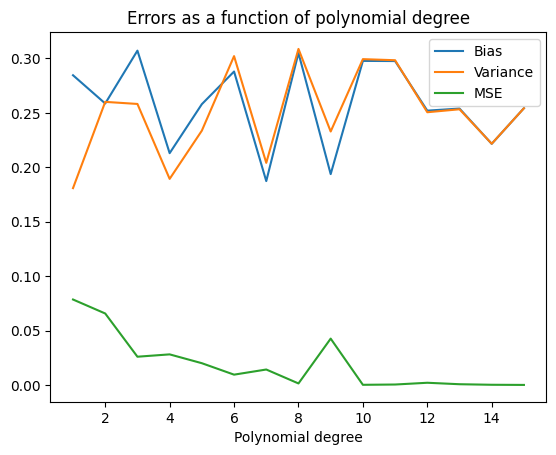

In [9]:
plt.plot(ps,biases,label="Bias")
plt.plot(ps,variances,label="Variance")
plt.plot(ps,mses,label="MSE")
plt.xlabel("Polynomial degree")
plt.title("Errors as a function of polynomial degree")
plt.legend()
plt.show()


This is wrong, MSE cannot be smaller than the bias or the variance. I don't know how to fix this.

**e)** Discuss the bias-variance trade-off as function of your model complexity (the degree of the polynomial).

**f)** Compute and discuss the bias and variance as function of the number of data points (choose a suitable polynomial degree to show something interesting).


## Exercise 5: Interpretation of scaling and metrics


In this course, we often ask you to scale data and compute various metrics. Although these practices are "standard" in the field, we will require you to demonstrate an understanding of _why_ you need to scale data and use these metrics. Both so that you can make better arguements about your results, and so that you will hopefully make fewer mistakes.

First, a few reminders: In this course you should always scale the columns of the feature matrix, and sometimes scale the target data, when it is worth the effort. By scaling, we mean subtracting the mean and dividing by the standard deviation, though there are many other ways to scale data. When scaling either the feature matrix or the target data, the intercept becomes a bit harder to implement and understand, so take care.

Briefly answer the following:

**a)** Why do we scale data?

Answer: To ensure that data with larger ranges do not dominate the model.

**b)** Why does the OLS method give practically equivalent models on scaled and unscaled data?

Answer: Only the mathematical relations between the variables are relevant in OLS regression, and scaling preserves those relationships.

**c)** Why does the Ridge method **not** give practically equivelent models on scaled and unscaled data? Why do we only consider the model on scaled data correct?

Answer: Ridge regression uses a cost function which penalizes the 2-norm of the model parameter vector. The squared value of the parameters themselves contribute to the cost function, and thus unscaled data will lead to a different result. Scaling the data ensures that each feature is taken into account, no only those with large absolute values. 

**d)** Why do we say that the Ridge method gives a biased model?

Answer: The introduction of the penalty term proportional to the squared model parameters forces them to shrink, reducing variance and overfitting at the expense of a non-zero bias.

**e)** Is the MSE of the OLS method affected by scaling of the feature matrix? Is it affected by scaling of the target data?

Answer: Scaling of the feature matrix will lead to an inverse scaling of the optimal model parameters, so the effects cancel out. Scaling of the target data on the other hand will change the MSE.

**f)** Read about the R2 score, a metric we will ask you to use a lot later in the course. Is the R2 score of the OLS method affected by scaling of the feature matrix? Is it affected by scaling of the target data?

Answer: The residual sum of squares is proportional to the MSE, so that term is not affected by scaling of the feature matrix for the same reason as before. The total sum of squares does not depend on $X$. So the R2 score is independent of feature scaling. 
The predicted value of $y$ is proportional to $y$ in OLS, so $SS_{res}$ will scale like the square of the scaling factor for $y$. $SS_{tot}$ also scales like the square of $y$. Therefore, the ratio between $SS_{res}$ and $SS_{tot}$ is constant and the R2 score is independent of scaling of the target data.

**g)** Give interpretations of the following R2 scores: 0, 0.5, 1.

Answer: If R2=0, then the model is no better fit than just a flat line equal to the mean of the data set. 
        If R2=0.5, then the model explains 50% of the variability of the data. 
        If R2=1, then there is a perfect fit between the predicted and target values.

**h)** What is an advantage of the R2 score over the MSE?

Answer: It is independent of scaling of both the features and the target data.